In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

file_path = 'UT.STN12.A2_C150.miniseed'

# Membaca data MiniSEED 
st = obspy.read(file_path)
#prepro sederhana
sta = st.detrend("linear")
tr_copy = sta.copy()
tr_copy.filter('bandpass', freqmin= 0.1, freqmax= 5, corners=4, zerophase=True)
#st.plot()
# Memecah komponen X, Y, dan Z
trace_x = tr_copy.select(channel="*N")[0]

C:\Users\User\AppData\Local\Temp\ipykernel_12200\2338613280.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row_time, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12200\2338613280.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row_time, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12200\2338613280.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row_time, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12200\2338613280.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row_t

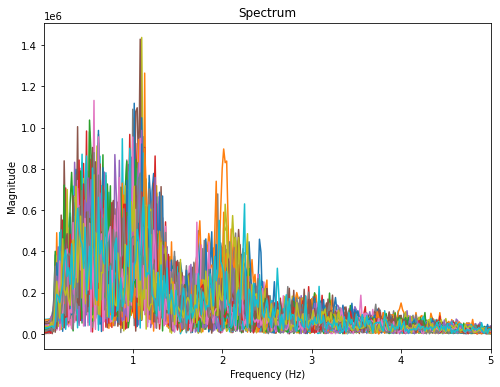

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from obspy.core import UTCDateTime
class hvsr:
    def __init__(self, trace_n, trace_w, trace_v, size):
        self.trace_n = trace_n
        self.trace_w = trace_w
        self.trace_v = trace_v
        self.size = size
    
    def time(self, trace):
        self.trace = trace
        start = self.trace.stats.starttime
        end = self.trace.stats.endtime
        #pembuatan table
        self.df = pd.DataFrameFrame(columns=['start','end'])
        i = 0
        #untuk membatasi pembuatan table time
        while start + i * self.size < end:
            #pembuatan range waktu window
            row_time = {'start': start + i * self.size, 'end': min(start + (i + 1) * self.size, end)}
            self.df = self.df.append(row_time, ignore_index=True)
            i += 1
        
    def window(self):
        self.result = []
        #pembacaan table untuk diambil isi table yang berupa range window
        for _, row in self.df.iterrows():
            st = UTCDateTime(row['start'])
            en = UTCDateTime(row['end'])
            if st != en:
                #membuat perulangan untuk memotong trace_n
                trim = self.trace.slice(st, en)
                if len(trim) > 0:
                    self.result.append(trim)
        #return self.result

    def fft(self):
        res_win = self.result
        plt.figure(figsize=(8,6))
        #perulangan fft
        for i in range(len(res_win)):
            fft = np.fft.fft(res_win[i])
            a_spectrum = np.abs(fft)
            sampling_rate = res_win[i].stats.sampling_rate
            npts= res_win[i].stats.npts
            freq= np.fft.fftfreq(npts,d =1/sampling_rate)
            #plot setiap pemacaan
            plt.plot(freq[:int(npts/2)], a_spectrum[:int(npts/2)])
        
        plt.title('Spectrum')
        plt.xlim(0.01, 5)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.show()
        
run = hvsr(trace_x, 60)
run.time()
run.window()
run.fft()